In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
numerical = [i for i in df.columns if df[i].dtype != 'O']

In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
for i in numerical:
    
    print(df[i].value_counts())

1.52152    3
1.51645    3
1.51590    3
1.52213    2
1.51763    2
          ..
1.51800    1
1.51750    1
1.51665    1
1.51736    1
1.53125    1
Name: RI, Length: 178, dtype: int64
13.00    5
13.02    5
13.21    5
12.85    4
13.64    4
        ..
13.60    1
12.62    1
12.35    1
13.90    1
13.99    1
Name: Na, Length: 142, dtype: int64
0.00    42
3.54     8
3.48     8
3.58     8
3.52     7
        ..
2.72     1
3.86     1
3.46     1
3.15     1
3.75     1
Name: Mg, Length: 94, dtype: int64
1.54    8
1.19    6
1.29    5
1.43    5
1.23    5
       ..
1.94    1
0.58    1
0.91    1
1.61    1
1.86    1
Name: Al, Length: 118, dtype: int64
72.86    4
73.28    4
73.10    4
72.99    4
73.11    4
        ..
73.72    1
72.55    1
73.46    1
72.44    1
72.14    1
Name: Si, Length: 133, dtype: int64
0.00    30
0.57    12
0.60    11
0.56    11
0.58    10
        ..
0.18     1
1.10     1
0.32     1
0.48     1
0.50     1
Name: K, Length: 65, dtype: int64
8.03    5
8.43    5
9.57    4
8.44    4
8.79    4


In [23]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

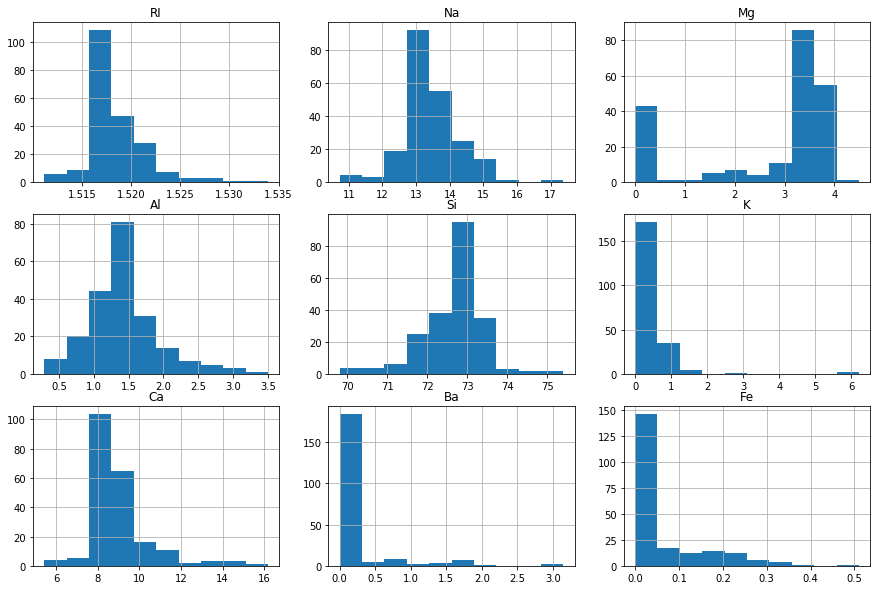

In [28]:
plt.figure(figsize = (15, 10))

for i in range(1, 10):
    plt.subplot(3,3,i)
    fig = df[numerical[i-1]].hist(bins = 10)
    fig.set_title(numerical[i-1])




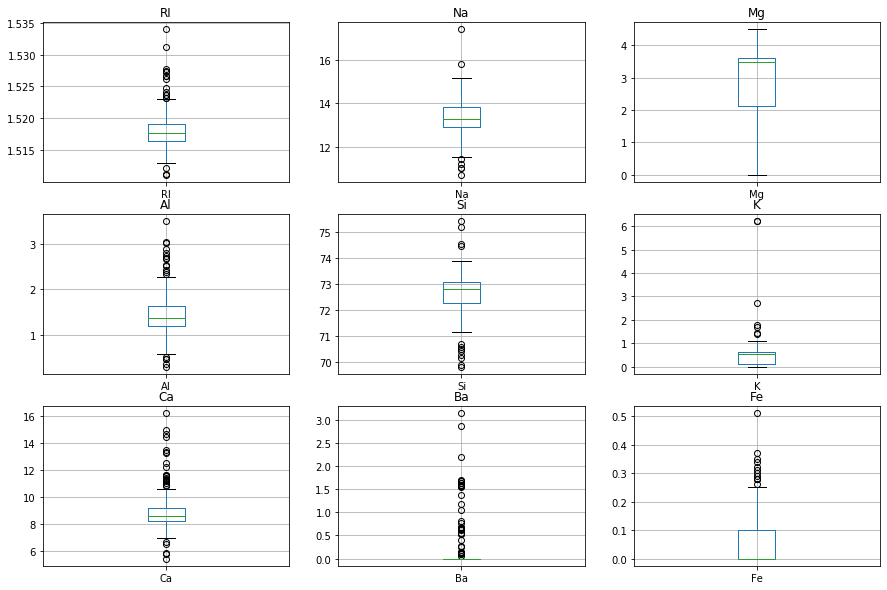

In [29]:
plt.figure(figsize = (15, 10))

for i in range(1, 10):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = [numerical[i-1]])
    fig.set_title(numerical[i-1])


In [38]:
for i in numerical:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    low = df[i].quantile(0.25) - (iqr * 1.5)
    high = df[i].quantile(0.75) + (iqr * 1.5)
    df[i] = np.where(df[i] > high, high, df[i])
    df[i] = np.where(df[i] < low, low, df[i])

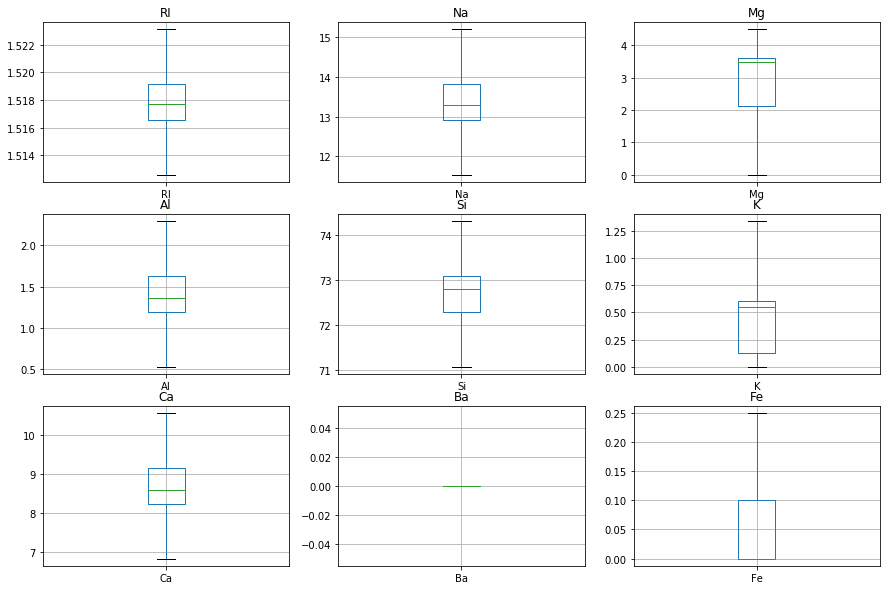

In [39]:
plt.figure(figsize = (15, 10))

for i in range(1, 10):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = [numerical[i-1]])
    fig.set_title(numerical[i-1])


In [40]:
x = df.drop("Type", axis = 1)
y = df["Type"]

In [64]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [66]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
y_pred = gnb.predict(xtest)

y_pred

array([6., 6., 5., 5., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 5., 2.,
       1., 1., 1., 1., 6., 6., 1., 1., 1., 2., 1., 2., 1., 5., 6., 1., 1.,
       1., 2., 1., 1., 6., 1., 1., 6., 6., 1., 6., 1., 1., 1., 2., 6., 1.,
       1., 2., 1.])

In [68]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, y_pred)))

Model accuracy score: 0.6296
